## Inferential Linear Regression

An exploration into the assumptions around inferential linear regression

In [1]:
import numpy as np
import pandas as pd

from glm.glm import GLM
from glm.families import Gaussian

%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels

from scipy import stats

#### Normally distributed coefficients
What assumptions need to be met for coefficients to be normally distributed?

What if the residuals are heteroscedastic?

In [20]:
npts = 1000
nsamples = 10000
coeffs = np.zeros(nsamples)
for i in range(nsamples):
    X = np.stack([np.ones(npts, dtype='int32'), stats.uniform(0, 10).rvs(npts)], axis=1)
    y = 2 * X[:, 1] + stats.norm(0, X[:, 1]).rvs(npts)
    model = GLM(family=Gaussian())
    model.fit(X, y)
    coeffs[i] = model.coef_[1]

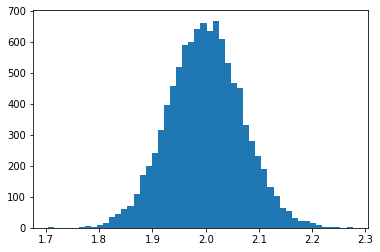

In [21]:
fig, ax = plt.subplots()
ax.hist(coeffs, bins=50);

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([1.70448346, 1.77004164, 1.77134341, ..., 2.25290469, 2.26593675,
         2.27589106])),
 (0.06913727377463835, 1.9993592865298815, 0.9998801396003444))

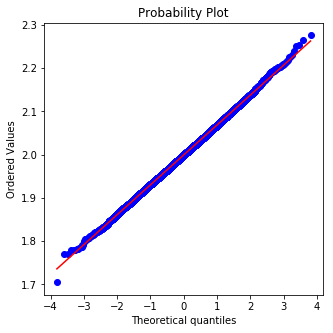

In [22]:
fig, ax = plt.subplots(figsize=(5, 5))
stats.probplot(coeffs, plot=ax);

This looks good.

What if the errors aren't normal?

In [83]:
npts = 4
nsamples = 100000
dist = stats.norm(0, 1)

coeffs = np.zeros(nsamples)
for i in range(nsamples):
    X = np.stack([np.ones(npts, dtype='int32'), stats.uniform(0, 10).rvs(npts)], axis=1)
    y = 2 * X[:, 1] + dist.rvs(npts)
    model = GLM(family=Gaussian())
    model.fit(X, y)
    coeffs[i] = model.coef_[1]

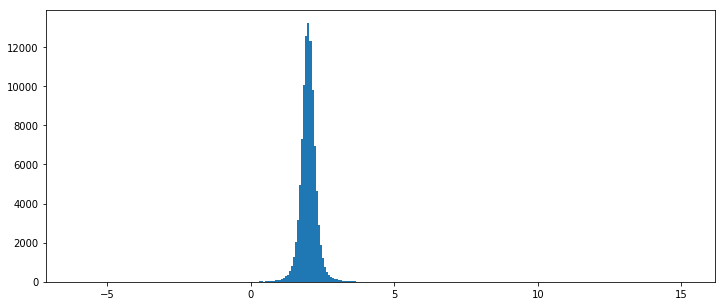

In [85]:
fig, ax = plt.subplots(figsize=(12,5))
ax.hist(coeffs, bins=300);

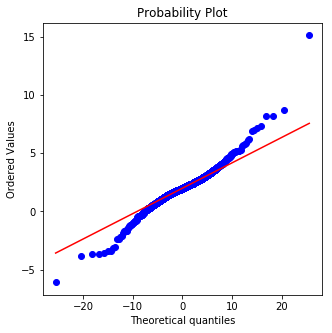

In [91]:
fig, ax = plt.subplots(figsize=(5, 5))
stats.probplot(coeffs, dist=stats.t(4), plot=ax);